<a href="https://colab.research.google.com/github/HaikalFrds/New-Project-1-SynergyTeam/blob/main/Fraud%20Detection_Synergy_Team.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install imbalanced-learn


# Import Library

In [3]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# System/OS
import os

# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Model selection and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Imbalanced data handling
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.pipeline import Pipeline as ImbPipeline

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
pd.set_option('display.max_columns', None)

# Load Dataset

**Kolom pada dataset**

---
1. trans_date_trans_time: Waktu transaksi. Dapat digunakan untuk mendeteksi pola waktu (misal transaksi yang sering terjadi pada waktu yang tidak wajar bisa dicurigai sebagai fraud).
2. cc_num: Nomor kartu kredit. Informasi penting terkait pengguna kartu, tetapi tidak langsung membantu mendeteksi fraud kecuali ada pola dari penggunaan kartu yang tidak biasa.
3. merchant: Nama merchant (penjual). Merchant tertentu mungkin lebih sering terlibat dalam transaksi fraud, sehingga bisa membantu mendeteksi risiko terkait merchant.
4. category: Kategori transaksi. Fraud mungkin lebih sering terjadi dalam kategori tertentu seperti barang mewah atau hiburan, yang memiliki nilai transaksi lebih tinggi.
5. amt: Jumlah uang dalam transaksi. Nilai transaksi yang sangat besar atau tidak sesuai dengan pola belanja biasanya bisa menjadi tanda fraud.
6. first: Nama depan pemegang kartu. Tidak terlalu relevan dalam mendeteksi fraud secara langsung.
7. last: Nama belakang pemegang kartu. Sama seperti first, tidak relevan secara langsung.
8. gender: Jenis kelamin pemegang kartu. Bisa digunakan untuk melihat pola demografis terkait fraud, meskipun tidak secara langsung mengindikasikan fraud.
9. street: Alamat jalan pemegang kartu. Dapat digunakan dalam deteksi anomali jika lokasi transaksi berbeda jauh dari alamat pemegang kartu.
10. city: Kota pemegang kartu. Sama seperti street, dapat digunakan untuk memeriksa ketidaksesuaian antara lokasi pemegang kartu dan transaksi.
11. state: Negara bagian pemegang kartu. Sama dengan city, bisa mendeteksi anomali lokasi.
12. zip: Kode pos pemegang kartu. Sama dengan city dan state, bisa membantu mendeteksi anomali geografis.
13. lat: Garis lintang lokasi pemegang kartu. Lokasi geografis dapat membantu mendeteksi ketidaksesuaian jika dibandingkan dengan lokasi transaksi.
14. long: Garis bujur lokasi pemegang kartu. Sama dengan lat, membantu mendeteksi lokasi.
15. city_pop: Populasi kota pemegang kartu. Bisa digunakan untuk memahami risiko terkait daerah, misalnya daerah padat penduduk mungkin memiliki lebih banyak transaksi dan risiko.
16. job: Pekerjaan pemegang kartu. Pekerjaan dengan penghasilan tinggi mungkin lebih rentan terhadap fraud karena lebih sering terlibat dalam transaksi besar.
17. dob: Tanggal lahir pemegang kartu. Usia pemegang kartu bisa menjadi faktor, misalnya kelompok usia tertentu mungkin lebih rentan terhadap fraud.
18. trans_num: ID unik untuk transaksi. Tidak relevan dalam deteksi fraud secara langsung.
19. unix_time: Waktu transaksi dalam format unix. Sama seperti trans_date_trans_time, membantu dalam menganalisis pola waktu.
20. merch_lat: Garis lintang merchant. Dapat digunakan untuk mendeteksi ketidaksesuaian antara lokasi merchant dan pemegang kartu.
21. merch_long: Garis bujur merchant. Sama seperti merch_lat, membantu mendeteksi anomali lokasi.
22. is_fraud: Label apakah transaksi adalah fraud (0 = tidak fraud, 1 = fraud). Ini adalah target yang perlu diprediksi.


In [6]:
os.chdir('/content/drive/MyDrive/Project/fraud_detection')
df = pd.read_csv('fraudTrain.csv')

In [7]:
train = pd.read_csv('fraudTrain.csv', index_col=0)
train.head(50)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,Dublin,PA,18917,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,Holcomb,KS,67851,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,Edinburg,VA,22824,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,Manor,PA,15665,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,Clarksville,TN,37040,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


In [8]:
train.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

# EDA

## Data Type Categories

In [9]:
# Action Items : Drop Kolom
identifer = ['first', 'last', 'trans_num']

# Action Items : New Features, OHE , Label Encoder (bertingkat), Grouping into a bigger group OR nunique more than 20 then drop
category = ['merchant', 'category', 'gender', 'street', 'city', 'state', 'zip', 'job', 'unix_time']

# Action Items : New Features = Distance
location = ['lat', 'long', 'merch_lat', 'merch_long']

# Action Items : New Features = Risk Time, Risk Day, Age
datetime = ['trans_date_trans_time', 'dob']

# Action Items : New Features : city_pop category, amt category
numerical = ['amt', 'city_pop']

# Action Items : Target Variabel to Modelling
target = ['is_fraud']

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop               

In [11]:
# Melihat variasi data
for category in train.columns:
  print(f'Kolom {category} : {train[category].nunique()}')

Kolom trans_date_trans_time : 1274791
Kolom cc_num : 983
Kolom merchant : 693
Kolom category : 14
Kolom amt : 52928
Kolom first : 352
Kolom last : 481
Kolom gender : 2
Kolom street : 983
Kolom city : 894
Kolom state : 51
Kolom zip : 970
Kolom lat : 968
Kolom long : 969
Kolom city_pop : 879
Kolom job : 494
Kolom dob : 968
Kolom trans_num : 1296675
Kolom unix_time : 1274823
Kolom merch_lat : 1247805
Kolom merch_long : 1275745
Kolom is_fraud : 2


In [12]:
# Filter data yang fraud
fraud = train.loc[train['is_fraud'] == 1].copy() # Use .copy() to avoid SettingWithCopyWarning
print(f'Data Fraud : {len(fraud)}')

# filter fraud berdasar tahun
# Ensure 'year' column exists or extract it from datetime column if needed
if 'year' not in fraud.columns:
    # Assuming 'trans_date_trans_time' is a datetime column
    fraud['year'] = pd.to_datetime(fraud['trans_date_trans_time']).dt.year

fraud_19 = fraud.loc[fraud['year'] == 2019]
fraud_20 = fraud.loc[fraud['year'] == 2020]

print(f'Data Fraud 2019 : {len(fraud_19)}')
print(f'Data Fraud 2020: {len(fraud_20)}')

Data Fraud : 7506
Data Fraud 2019 : 5220
Data Fraud 2020: 2286


## Fraud Category Distribution

In [13]:
train['is_fraud'].value_counts(normalize=True)

,proportion
is_fraud,
0,0.994211
1,0.005789


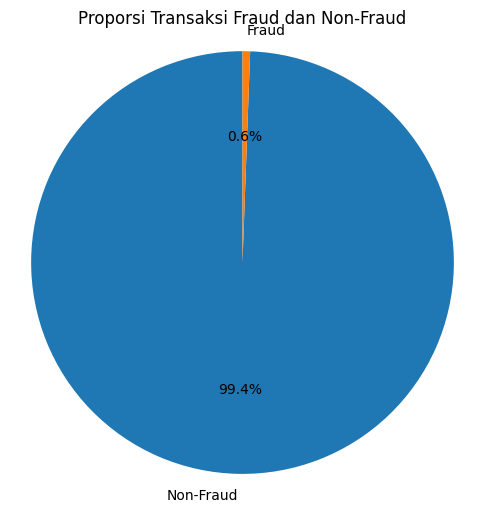

In [14]:
# Menghitung jumlah transaksi fraud dan non-fraud
fraud_counts = train['is_fraud'].value_counts()

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=['Non-Fraud', 'Fraud'], autopct='%1.1f%%', startangle=90)
plt.title('Proporsi Transaksi Fraud dan Non-Fraud')
plt.axis('equal')  # Membuat pie chart berbentuk lingkaran
plt.show()

Artinya data ini dalah data Imbalance

## ETC EDA

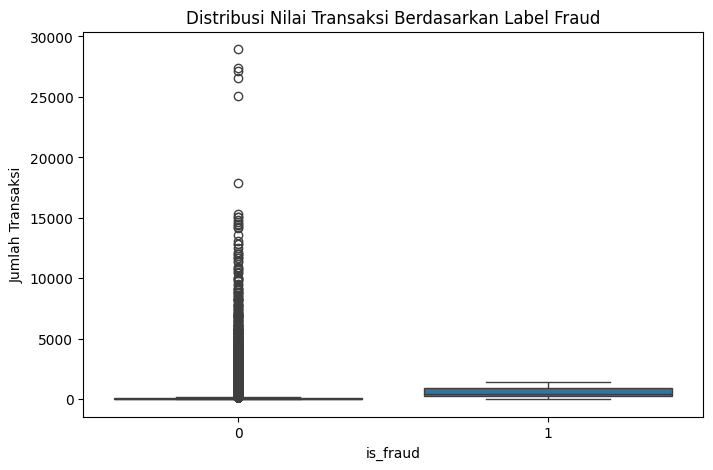

In [15]:
#Boxplot nilai transaksi berdasarkan label fraud
plt.figure(figsize=(8, 5))
sns.boxplot(data=train, x='is_fraud', y='amt')
plt.title('Distribusi Nilai Transaksi Berdasarkan Label Fraud')
plt.xlabel('is_fraud')
plt.ylabel('Jumlah Transaksi')
plt.show()

Text(0, 0.5, 'Kategori')

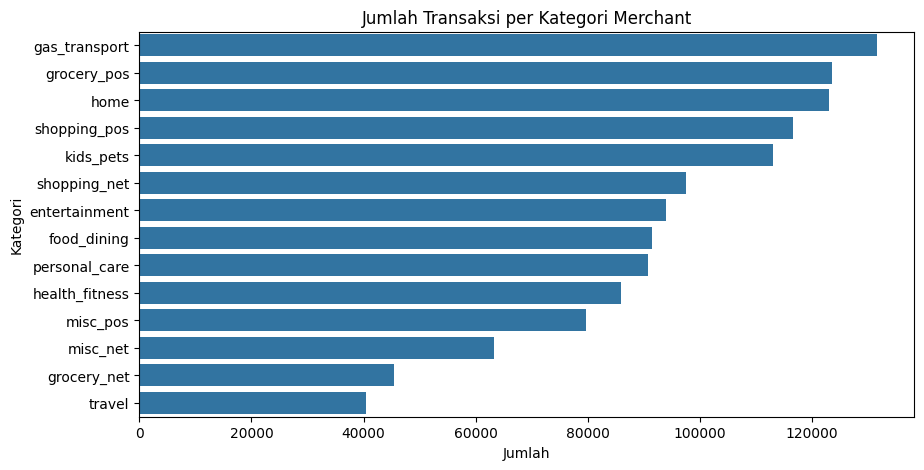

In [16]:
#Jumlah transaksi berdasarkan kategori merchant
plt.figure(figsize=(10, 5))
sns.countplot(data=train, y='category', order=train['category'].value_counts().index)
plt.title('Jumlah Transaksi per Kategori Merchant')
plt.xlabel('Jumlah')
plt.ylabel('Kategori')

# Preprocessing Data

## Drop Identifier

In [17]:
# Drop kolom identity
train.drop(columns= identifer,
              inplace=True)
train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,1325376186,38.674999,-78.632459,0


## Checking Data Duplicates

In [18]:
# cek data duplicated
train.duplicated().sum()

np.int64(0)

## Checking Missing Value (Optional)

In [19]:
# Cek Missing value
train.isnull().sum()

,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
gender,0
street,0
city,0
state,0
zip,0


## Data Imputation

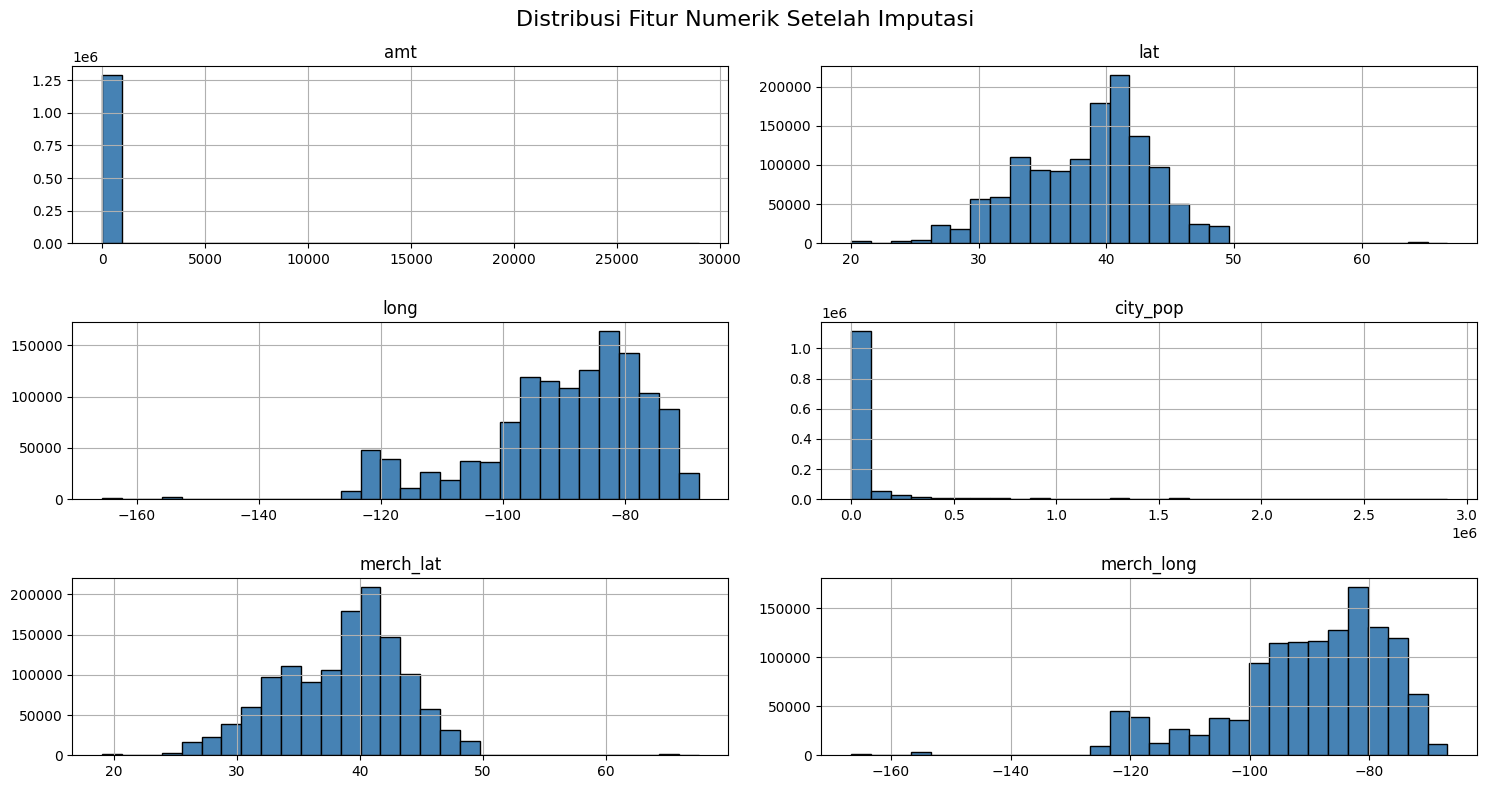

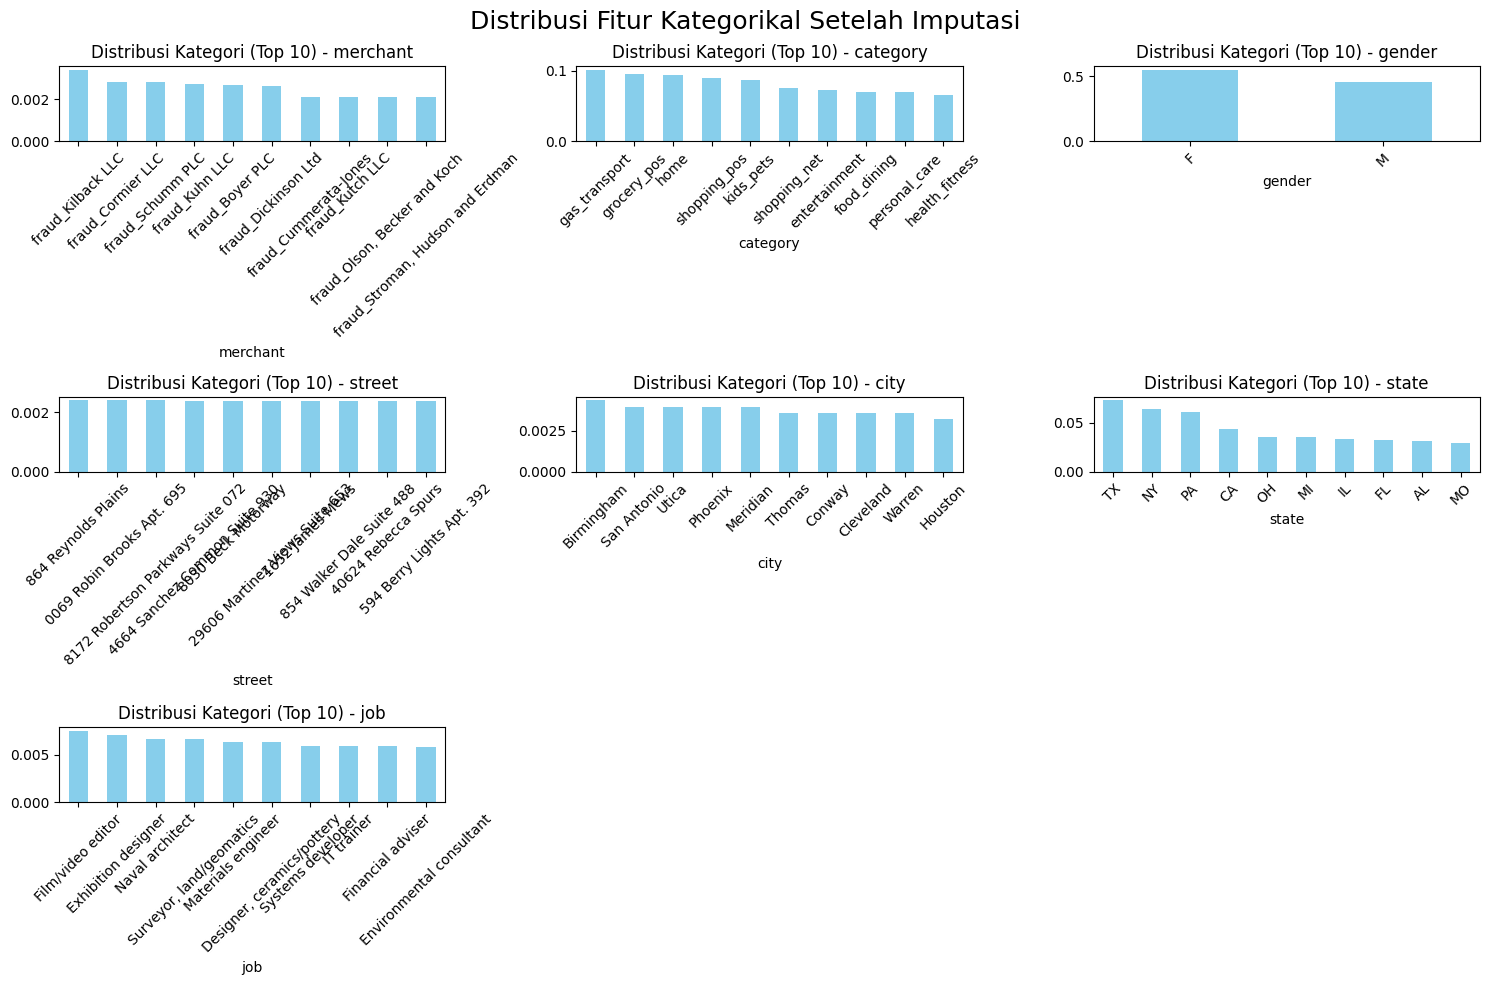

In [20]:
# Kolom numerik dan kategorikal dipisahkan
numeric_cols = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']
categorical_cols = ['merchant', 'category', 'gender', 'street', 'city', 'state', 'job']

# Imputer untuk numerik (dengan median)
num_imputer = SimpleImputer(strategy='median')
train[numeric_cols] = num_imputer.fit_transform(train[numeric_cols])

# Imputer untuk kategorikal (dengan modus)
cat_imputer = SimpleImputer(strategy='most_frequent')
train[categorical_cols] = cat_imputer.fit_transform(train[categorical_cols])

# Visualisasi distribusi fitur numerik setelah imputasi
train[numeric_cols].hist(bins=30, figsize=(15, 8), color='steelblue', edgecolor='black')
plt.suptitle("Distribusi Fitur Numerik Setelah Imputasi", fontsize=16)
plt.tight_layout()
plt.show()

# Visualisasi kategori dominan setelah imputasi
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1)
    train[col].value_counts(normalize=True).head(10).plot(kind='bar', color='skyblue')
    plt.title(f"Distribusi Kategori (Top 10) - {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.suptitle("Distribusi Fitur Kategorikal Setelah Imputasi", fontsize=18)
plt.tight_layout()
plt.show()


# Feature Engineering / New Feature + Label Encoder Manually

## Calculate age from date of birth

In [21]:
# Calculate age from date of birth
transaction_date = pd.to_datetime(train['trans_date_trans_time'])
birth_date = pd.to_datetime(train['dob'])
train['age'] = transaction_date.dt.year - birth_date.dt.year - (
    (transaction_date.dt.month < birth_date.dt.month) |
    ((transaction_date.dt.month == birth_date.dt.month) & (transaction_date.dt.day < birth_date.dt.day))
)

## Time-based features

In [22]:
train['trans_date_trans_time'] = pd.to_datetime(train['trans_date_trans_time'])

# Setelah dikonversi, barulah gunakan .dt untuk ekstraksi waktu
train['hour'] = train['trans_date_trans_time'].dt.hour
train['year'] = train['trans_date_trans_time'].dt.year
train['month'] = train['trans_date_trans_time'].dt.month
train['day'] = train['trans_date_trans_time'].dt.day
train['day_of_week'] = train['trans_date_trans_time'].dt.weekday + 1  # Senin = 0, Minggu = 6


## Binary time features

In [23]:
train['tx_during_weekend'] = train['trans_date_trans_time'].dt.dayofweek.isin([5, 6]).astype(int)
train['tx_during_night'] = ((train['hour'] >= 21) | (train['hour'] < 6)).astype(int)

## Customer hour behavior analysis

In [24]:
customer_hour_stats = train.groupby('cc_num')['hour'].agg(['mean', 'std'])
# Apply prefix and then merge
customer_hour_stats_prefixed = customer_hour_stats.add_prefix('customer_hour_')
train = train.merge(customer_hour_stats_prefixed, left_on='cc_num', right_index=True)

# Now the prefixed columns should exist in 'train'
train['hour_deviation_from_normal'] = np.abs(train['hour'] - train['customer_hour_mean'])
train['unusual_hour_for_customer'] = (
    train['hour_deviation_from_normal'] > 2 * train['customer_hour_std'].fillna(0)
).astype(int)

## Risk Encoding (Out-of-Fold method)

In [25]:
from sklearn.model_selection import KFold

def oof_risk_encoding(df, feature, target, n_splits=5, seed=42):
    """Out-of-fold risk encoding to prevent data leakage"""
    oof_encoded = pd.Series(index=df.index, dtype=float)
    global_mean = df[target].mean()

    kf = KFold(n_splits=n_splits, shuffle=True, random_state=seed)

    for train_idx, valid_idx in kf.split(df):
        train_df, valid_df = df.iloc[train_idx], df.iloc[valid_idx]

        # Calculate mean fraud rate per category in training fold
        risk_map = train_df.groupby(feature)[target].mean()

        # Map to validation fold
        encoded = valid_df[feature].map(risk_map)
        encoded = encoded.fillna(global_mean)

        oof_encoded.iloc[valid_idx] = encoded

    return oof_encoded

# Apply risk encoding to categorical features
for col in ['merchant', 'category', 'zip', 'city', 'state']:
    train[f'{col}_risk_encoded'] = oof_risk_encoding(train, col, 'is_fraud')

In [26]:
train.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'dob', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'age',
       'hour', 'year', 'month', 'day', 'day_of_week', 'tx_during_weekend',
       'tx_during_night', 'customer_hour_mean', 'customer_hour_std',
       'hour_deviation_from_normal', 'unusual_hour_for_customer',
       'merchant_risk_encoded', 'category_risk_encoded', 'zip_risk_encoded',
       'city_risk_encoded', 'state_risk_encoded'],
      dtype='object')

## Age Identifier

In [27]:
# Calculate age from date of birth
train['dob'] = pd.to_datetime(train['dob'])
transaction_date = pd.to_datetime(train['trans_date_trans_time'])
birth_date = pd.to_datetime(train['dob']) # Ensure this is already datetime or convert here

# Calculate age
train['age'] = transaction_date.dt.year - birth_date.dt.year - (
    (transaction_date.dt.month < birth_date.dt.month) |
    ((transaction_date.dt.month == birth_date.dt.month) & (transaction_date.dt.day < birth_date.dt.day))
)

# Function to categorize age into groups
def categorize_age(age):
    if age < 18:
        return 0 #'Minor'
    elif age >= 18 and age < 25:
        return 1 #'Young Adult'
    elif age >= 25 and age < 40:
        return 2 #'Adult'
    elif age >= 40 and age < 60:
        return 3 #'Middle Aged'
    else:
        return 4 #'Senior'

# Apply age categorization
train['age_category'] = train['age'].apply(categorize_age)


train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud,age,hour,year,month,day,day_of_week,tx_during_weekend,tx_during_night,customer_hour_mean,customer_hour_std,hour_deviation_from_normal,unusual_hour_for_customer,merchant_risk_encoded,category_risk_encoded,zip_risk_encoded,city_risk_encoded,state_risk_encoded,age_category
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,1325376018,36.011293,-82.048315,0,30,0,2019,1,1,2,0,1,14.021203,6.496407,14.021203,1,0.014259,0.014508,0.000000,0.000000,0.004917,2
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1325376044,49.159047,-118.186462,0,40,0,2019,1,1,2,0,1,14.021452,6.379171,14.021452,1,0.011610,0.014198,0.000000,0.000000,0.005301,3
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,1325376051,43.150704,-112.154481,0,56,0,2019,1,1,2,0,1,10.339960,7.059066,10.339960,0,0.002653,0.002506,0.000000,0.000000,0.002039,3
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,1325376076,47.034331,-112.561071,0,51,0,2019,1,1,2,0,1,12.265720,7.135191,12.265720,0,0.004323,0.004633,0.025575,0.025575,0.002653,3
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,1325376186,38.674999,-78.632459,0,32,0,2019,1,1,2,0,1,12.110560,6.926139,12.110560,0,0.003931,0.003025,0.000000,0.000000,0.007220,2


## Geospatial Distance Feature

In [28]:
# Fungsi untuk menghitung jarak menggunakan rumus Haversine
def haversine(lat1, lon1, lat2, lon2):
    # Konversi dari derajat ke radian
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    # Jarak dalam kilometer (radius bumi = 6371 km)
    distance = 6371 * c
    return distance

    # Menghitung jarak untuk setiap transaksi
train['distance'] = train.apply(lambda row: haversine(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)

# Misalkan df adalah DataFrame yang berisi kolom 'distance'
bins = [0, train['distance'].quantile(0.25), train['distance'].quantile(0.75), train['distance'].max()]
labels = ['Dekat', 'Sedang', 'Jauh']

# Membuat kolom baru 'distance_category'
train['distance_category'] = pd.cut(train['distance'], bins=bins, labels=labels, include_lowest=True)
train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud,age,hour,year,month,day,day_of_week,tx_during_weekend,tx_during_night,customer_hour_mean,customer_hour_std,hour_deviation_from_normal,unusual_hour_for_customer,merchant_risk_encoded,category_risk_encoded,zip_risk_encoded,city_risk_encoded,state_risk_encoded,age_category,distance,distance_category
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,1325376018,36.011293,-82.048315,0,30,0,2019,1,1,2,0,1,14.021203,6.496407,14.021203,1,0.014259,0.014508,0.000000,0.000000,0.004917,2,78.597568,Sedang
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1325376044,49.159047,-118.186462,0,40,0,2019,1,1,2,0,1,14.021452,6.379171,14.021452,1,0.011610,0.014198,0.000000,0.000000,0.005301,3,30.212176,Dekat
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,1325376051,43.150704,-112.154481,0,56,0,2019,1,1,2,0,1,10.339960,7.059066,10.339960,0,0.002653,0.002506,0.000000,0.000000,0.002039,3,108.206083,Jauh
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,1325376076,47.034331,-112.561071,0,51,0,2019,1,1,2,0,1,12.265720,7.135191,12.265720,0,0.004323,0.004633,0.025575,0.025575,0.002653,3,95.673231,Sedang
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,1325376186,38.674999,-78.632459,0,32,0,2019,1,1,2,0,1,12.110560,6.926139,12.110560,0,0.003931,0.003025,0.000000,0.000000,0.007220,2,77.556744,Sedang


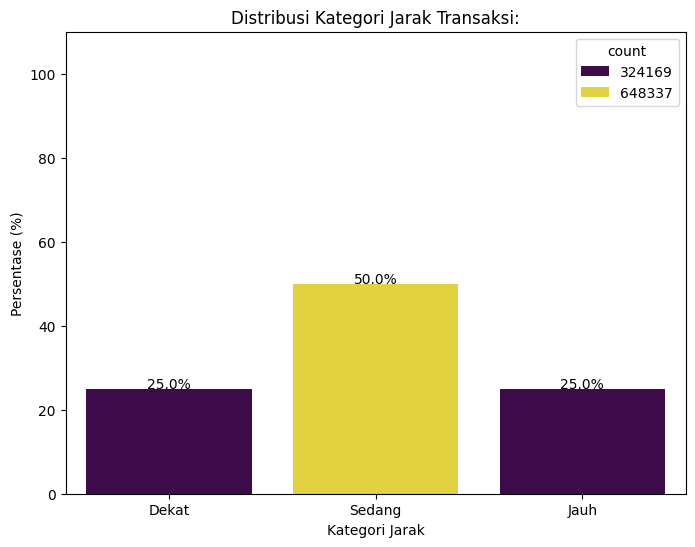

In [29]:
# Hitung frekuensi dan persentase untuk setiap kategori jarak
distance_counts = train['distance_category'].value_counts()
distance_percentages = train['distance_category'].value_counts(normalize=True) * 100

# Gabungkan keduanya ke dalam satu DataFrame
distance_summary = pd.DataFrame({
    'Count': distance_counts,
    'Percentage': distance_percentages
})

# Buat visualisasi
plt.figure(figsize=(8, 6))
sns.barplot(x=distance_summary.index, y=distance_summary['Percentage'], palette='viridis', hue=distance_counts)
plt.title('Distribusi Kategori Jarak Transaksi:')
plt.xlabel('Kategori Jarak')
plt.ylabel('Persentase (%)')

# Menampilkan persentase di atas setiap bar
for index, row in distance_summary.iterrows():
    plt.text(index, row['Percentage'], f'{row["Percentage"]:.1f}%', color='black', ha="center")

plt.ylim(0, 110) # Sesuaikan batas y agar persentase terlihat jelas
plt.show()

In [30]:
# prompt: encode distance_category

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Terapkan Label Encoding pada kolom 'distance_category'
train['distance_category_encoded'] = label_encoder.fit_transform(train['distance_category'])

# Tampilkan beberapa baris pertama untuk verifikasi
print(train[['distance_category', 'distance_category_encoded']].head())

# Tampilkan mapping antara kategori asli dan nilai encoded
print("\nMapping Kategori Jarak:")
for category, encoded_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{category}: {encoded_value}")


  distance_category  distance_category_encoded
0            Sedang                          2
1             Dekat                          0
2              Jauh                          1
3            Sedang                          2
4            Sedang                          2

Mapping Kategori Jarak:
Dekat: 0
Jauh: 1
Sedang: 2


In [31]:
train.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'dob', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'age',
       'hour', 'year', 'month', 'day', 'day_of_week', 'tx_during_weekend',
       'tx_during_night', 'customer_hour_mean', 'customer_hour_std',
       'hour_deviation_from_normal', 'unusual_hour_for_customer',
       'merchant_risk_encoded', 'category_risk_encoded', 'zip_risk_encoded',
       'city_risk_encoded', 'state_risk_encoded', 'age_category', 'distance',
       'distance_category', 'distance_category_encoded'],
      dtype='object')

In [32]:
# prompt: drop distance_category

train = train.drop(columns=['distance_category'])
train.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'dob', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'age',
       'hour', 'year', 'month', 'day', 'day_of_week', 'tx_during_weekend',
       'tx_during_night', 'customer_hour_mean', 'customer_hour_std',
       'hour_deviation_from_normal', 'unusual_hour_for_customer',
       'merchant_risk_encoded', 'category_risk_encoded', 'zip_risk_encoded',
       'city_risk_encoded', 'state_risk_encoded', 'age_category', 'distance',
       'distance_category_encoded'],
      dtype='object')

## Customer Behavioral Patterns

In [33]:
# Daily transaction frequency per customer
cc_daily_counts = train.groupby(['cc_num', train['trans_date_trans_time'].dt.date]).size().reset_index(name='daily_transactions')
mean_daily_counts = cc_daily_counts.groupby('cc_num')['daily_transactions'].mean().round().astype(int)
train = train.merge(mean_daily_counts.rename('avg_daily_transactions'), on='cc_num', how='left')

# Average transaction amount per customer (excluding fraud)
avg_transaction_amount = train[train['is_fraud'] != 1].groupby('cc_num')['amt'].mean().round(2)
train = train.merge(avg_transaction_amount.rename('avg_transaction_amount'), on='cc_num', how='left')
train['avg_transaction_amount'] = train['avg_transaction_amount'].fillna(0)

## RFM Features (Recency, Frequency, Monetary)

In [34]:
# Sort data by customer and time
data = train.sort_values(['cc_num', 'trans_date_trans_time']).reset_index(drop=True)

### RECENCY FEATURES (R)

In [35]:
# Time since last transaction
data['time_since_last_txn_min_R'] = data.groupby('cc_num')['trans_date_trans_time'].diff().dt.total_seconds() / 60
data['time_since_last_txn_min_R'] = data['time_since_last_txn_min_R'].fillna(-1)

# Days since first transaction for each customer
customer_first_txn = data.groupby('cc_num')['trans_date_trans_time'].min()
data = data.merge(customer_first_txn.rename('first_txn_date'), on='cc_num', how='left')
data['days_since_first_txn_R'] = (data['trans_date_trans_time'] - data['first_txn_date']).dt.days

### FREQUENCY FEATURES (F)

In [36]:
# Rolling window features for different time periods
data_indexed = data.set_index('trans_date_trans_time')
for window in [1, 7, 30]:
    window_str = f'{window}D'

    # Count of transactions in last N days
    count_tx = data_indexed.groupby('cc_num')['amt'].rolling(window_str).count().reset_index(level=0, drop=True)
    data_indexed[f'txn_count_last_{window}_days_F'] = count_tx

    # Transaction frequency per day in window
    data_indexed[f'txn_freq_per_day_{window}d_F'] = count_tx / window

# Convert back to regular dataframe
data = data_indexed.reset_index()

# Additional Frequency features
data['cumulative_txn_count_F'] = data.groupby('cc_num').cumcount() + 1
data['avg_txn_per_day_F'] = data['cumulative_txn_count_F'] / (data['days_since_first_txn_R'] + 1)

### MONETARY FEATURES (M)

In [37]:
# Rolling monetary features
data_indexed = data.set_index('trans_date_trans_time')
for window in [1, 7, 30]:
    window_str = f'{window}D'

    # Sum of transaction amounts in last N days
    sum_amt = data_indexed.groupby('cc_num')['amt'].rolling(window_str).sum().reset_index(level=0, drop=True)
    data_indexed[f'total_amt_last_{window}_days_M'] = sum_amt

    # Average amount in last N days
    count_tx = data_indexed.groupby('cc_num')['amt'].rolling(window_str).count().reset_index(level=0, drop=True)
    data_indexed[f'avg_amt_last_{window}_days_M'] = sum_amt / count_tx

    # Max amount in last N days
    max_amt = data_indexed.groupby('cc_num')['amt'].rolling(window_str).max().reset_index(level=0, drop=True)
    data_indexed[f'max_amt_last_{window}_days_M'] = max_amt

    # Standard deviation of amounts in last N days
    std_amt = data_indexed.groupby('cc_num')['amt'].rolling(window_str).std().reset_index(level=0, drop=True)
    data_indexed[f'std_amt_last_{window}_days_M'] = std_amt.fillna(0)

# Convert back to regular dataframe
data = data_indexed.reset_index()

# Additional Monetary features
data['cumulative_spending_M'] = data.groupby('cc_num')['amt'].cumsum()
data['avg_spending_per_txn_M'] = data['cumulative_spending_M'] / data['cumulative_txn_count_F']

# Drop temporary column
data.drop(columns=['first_txn_date'], inplace=True)

## Risk Encoding (Out-of-Fold method)

In [38]:
def oof_risk_encoding(df, feature, target, n_splits=5, seed=42):
    """Out-of-fold risk encoding to prevent data leakage"""
    oof_encoded = pd.Series(index=df.index, dtype=float)
    global_mean = df[target].mean()

    kf = KFold(n_splits=n_splits, shuffle=True, random_state=seed)

    for train_idx, valid_idx in kf.split(df):
        train_df, valid_df = df.iloc[train_idx], df.iloc[valid_idx]

        # Calculate mean fraud rate per category in training fold
        risk_map = train_df.groupby(feature)[target].mean()

        # Map to validation fold
        encoded = valid_df[feature].map(risk_map)
        encoded = encoded.fillna(global_mean)

        oof_encoded.iloc[valid_idx] = encoded

    return oof_encoded

# Apply risk encoding to categorical features
for col in ['merchant', 'category', 'zip', 'city', 'state']:
    data[f'{col}_risk_encoded'] = oof_risk_encoding(data, col, 'is_fraud')

In [39]:
# prompt: encode datetime etc

import pandas as pd
# Calculate Age from Date of Birth
data['age'] = (pd.to_datetime('now').year - data['dob'].dt.year).astype(int)

# Function to categorize age into groups
def categorize_age(age):
    if age < 18:
        return 0 #'Minor'
    elif age >= 18 and age < 25:
        return 1 #'Young Adult'
    elif age >= 25 and age < 40:
        return 2 #'Adult'
    elif age >= 40 and age < 60:
        return 3 #'Middle Aged'
    else:
        return 4 #'Senior'

# Apply age categorization
data['age_category'] = data['age'].apply(categorize_age)


data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud,age,hour,year,month,day,day_of_week,tx_during_weekend,tx_during_night,customer_hour_mean,customer_hour_std,hour_deviation_from_normal,unusual_hour_for_customer,merchant_risk_encoded,category_risk_encoded,zip_risk_encoded,city_risk_encoded,state_risk_encoded,age_category,distance,distance_category_encoded,avg_daily_transactions,avg_transaction_amount,time_since_last_txn_min_R,days_since_first_txn_R,txn_count_last_1_days_F,txn_freq_per_day_1d_F,txn_count_last_7_days_F,txn_freq_per_day_7d_F,txn_count_last_30_days_F,txn_freq_per_day_30d_F,cumulative_txn_count_F,avg_txn_per_day_F,total_amt_last_1_days_M,avg_amt_last_1_days_M,max_amt_last_1_days_M,std_amt_last_1_days_M,total_amt_last_7_days_M,avg_amt_last_7_days_M,max_amt_last_7_days_M,std_amt_last_7_days_M,total_amt_last_30_days_M,avg_amt_last_30_days_M,max_amt_last_30_days_M,std_amt_last_30_days_M,cumulative_spending_M,avg_spending_per_txn_M
0,2019-01-01 12:47:15,60416207185,"fraud_Jones, Sawayn and Romaguera",misc_net,7.27,F,9886 Anita Drive,Fort Washakie,WY,82514,43.0048,-108.8964,1645.0,Information systems manager,1986-02-17,1325422035,43.974711,-109.741904,0,39,12,2019,1,1,2,0,0,13.687747,6.492326,1.687747,0,0.007913,0.014146,0.006048,0.006048,0.005617,2,127.606239,1,3,55.1,-1.000000,0,1.0,1.0,1.0,0.142857,1.0,0.033333,1,1.0,7.27,7.2700,7.27,0.000000,7.27,7.270,7.27,0.000000,7.27,7.270,7.27,0.000000,7.27,7.270
1,2019-01-02 08:44:57,60416207185,fraud_Berge LLC,gas_transport,52.94,F,9886 Anita Drive,Fort Washakie,WY,82514,43.0048,-108.8964,1645.0,Information systems manager,1986-02-17,1325493897,42.018766,-109.044172,0,39,8,2019,1,2,3,0,0,13.687747,6.492326,5.687747,0,0.002818,0.004701,0.006048,0.006048,0.005617,2,110.308921,1,3,55.1,1197.700000,0,2.0,2.0,2.0,0.285714,2.0,0.066667,2,2.0,60.21,30.1050,52.94,32.293567,60.21,30.105,52.94,32.293567,60.21,30.105,52.94,32.293567,60.21,30.105
2,2019-01-02 08:47:36,60416207185,fraud_Luettgen PLC,gas_transport,82.08,F,9886 Anita Drive,Fort Washakie,WY,82514,43.0048,-108.8964,1645.0,Information systems manager,1986-02-17,1325494056,42.961335,-109.157564,0,39,8,2019,1,2,3,0,0,13.687747,6.492326,5.687747,0,0.004735,0.004626,0.006671,0.006671,0.005231,2,21.787261,0,3,55.1,2.650000,0,3.0,3.0,3.0,0.428571,3.0,0.100000,3,3.0,142.29,47.4300,82.08,37.708144,142.29,47.430,82.08,37.708144,142.29,47.430,82.08,37.708144,142.29,47.430
3,2019-01-02 12:38:14,60416207185,fraud_Daugherty LLC,kids_pets,34.79,F,9886 Anita Drive,Fort Washakie,WY,82514,43.0048,-108.8964,1645.0,Information systems manager,1986-02-17,1325507894,42.228227,-108.747683,0,39,12,2019,1,2,3,0,0,13.687747,6.492326,1.687747,0,0.004437,0.002044,0.005350,0.005350,0.005904,2,87.204215,2,3,55.1,230.633333,0,4.0,4.0,4.0,0.571429,4.0,0.133333,4,4.0,177.08,44.2700,82.08,31.430534,177.08,44.270,82.08,31.430534,177.08,44.270,82.08,31.430534,177.08,44.270
4,2019-01-02 13:10:46,60416207185,fraud_Beier and Sons,home,27.18,F,9886 Anita Drive,Fort Washakie,WY,82514,43.0048,-108.8964,1645.0,Information systems manager,1986-02-17,1325509846,43.321745,-108.091143,0,39,13,2019,1,2,3,0,0,13.687747,6.492326,0.687747,0,0.000512,0.001612,0.006454,0.006454,0.006339,2,74.212965,2,3,55.1,32.533333,1,4.0,4.0,5.0,0.714286,5.0,0.166667,5,2.5,196.99,49.2475,82.08,24.410390,204.26,40.852,82.08,28.272292,204.26,40.852,82.08,28.272292,204.26,40.852


In [40]:
# Define columns to exclude from features
exclude_cols = [
    'trans_date_trans_time', 'cc_num', 'merchant', 'first', 'last', 'street',
    'city', 'state', 'zip', 'job', 'trans_num', 'unix_time', 'is_fraud',
    'customer_hour_mean', 'customer_hour_std', 'dob', 'avg_transaction_amount_y'
]

# Get all potential feature columns
feature_cols = [col for col in data.columns if col not in exclude_cols]


In [41]:
# Handle categorical columns that might still exist
categorical_features = []
numerical_features = []

for col in feature_cols:
    if data[col].dtype == 'object':
        categorical_features.append(col)
    else:
        numerical_features.append(col)

In [42]:
print(data[numerical_features].isnull().sum())

amt                           0
lat                           0
long                          0
city_pop                      0
merch_lat                     0
merch_long                    0
age                           0
hour                          0
year                          0
month                         0
day                           0
day_of_week                   0
tx_during_weekend             0
tx_during_night               0
hour_deviation_from_normal    0
unusual_hour_for_customer     0
merchant_risk_encoded         0
category_risk_encoded         0
zip_risk_encoded              0
city_risk_encoded             0
state_risk_encoded            0
age_category                  0
distance                      0
distance_category_encoded     0
avg_daily_transactions        0
avg_transaction_amount        0
time_since_last_txn_min_R     0
days_since_first_txn_R        0
txn_count_last_1_days_F       0
txn_freq_per_day_1d_F         0
txn_count_last_7_days_F       0
txn_freq

# FEATURE ENCODING AND PREPROCESSING

In [43]:
# Define columns to exclude from features
exclude_cols = [
    'trans_date_trans_time', 'cc_num', 'merchant', 'first', 'last', 'street',
    'city', 'state', 'zip', 'job', 'trans_num', 'unix_time', 'is_fraud',
    'customer_hour_mean', 'customer_hour_std', 'dob', 'avg_transaction_amount_y'
]

# Get all potential feature columns
feature_cols = [col for col in data.columns if col not in exclude_cols]


In [44]:
# Handle categorical columns that might still exist
categorical_features = []
numerical_features = []

for col in feature_cols:
    if data[col].dtype == 'object':
        categorical_features.append(col)
    else:
        numerical_features.append(col)

In [45]:
categorical_features

['category', 'gender']

In [46]:
numerical_features

['amt',
 'lat',
 'long',
 'city_pop',
 'merch_lat',
 'merch_long',
 'age',
 'hour',
 'year',
 'month',
 'day',
 'day_of_week',
 'tx_during_weekend',
 'tx_during_night',
 'hour_deviation_from_normal',
 'unusual_hour_for_customer',
 'merchant_risk_encoded',
 'category_risk_encoded',
 'zip_risk_encoded',
 'city_risk_encoded',
 'state_risk_encoded',
 'age_category',
 'distance',
 'distance_category_encoded',
 'avg_daily_transactions',
 'avg_transaction_amount',
 'time_since_last_txn_min_R',
 'days_since_first_txn_R',
 'txn_count_last_1_days_F',
 'txn_freq_per_day_1d_F',
 'txn_count_last_7_days_F',
 'txn_freq_per_day_7d_F',
 'txn_count_last_30_days_F',
 'txn_freq_per_day_30d_F',
 'cumulative_txn_count_F',
 'avg_txn_per_day_F',
 'total_amt_last_1_days_M',
 'avg_amt_last_1_days_M',
 'max_amt_last_1_days_M',
 'std_amt_last_1_days_M',
 'total_amt_last_7_days_M',
 'avg_amt_last_7_days_M',
 'max_amt_last_7_days_M',
 'std_amt_last_7_days_M',
 'total_amt_last_30_days_M',
 'avg_amt_last_30_days_M',


In [47]:
if categorical_features:
    for col in categorical_features:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col].astype(str))
        numerical_features.append(col)

In [48]:
# prompt: data[numerical_features] cek nan di semua kolom yang ada di sini

print(data[numerical_features].isnull().sum())

amt                           0
lat                           0
long                          0
city_pop                      0
merch_lat                     0
merch_long                    0
age                           0
hour                          0
year                          0
month                         0
day                           0
day_of_week                   0
tx_during_weekend             0
tx_during_night               0
hour_deviation_from_normal    0
unusual_hour_for_customer     0
merchant_risk_encoded         0
category_risk_encoded         0
zip_risk_encoded              0
city_risk_encoded             0
state_risk_encoded            0
age_category                  0
distance                      0
distance_category_encoded     0
avg_daily_transactions        0
avg_transaction_amount        0
time_since_last_txn_min_R     0
days_since_first_txn_R        0
txn_count_last_1_days_F       0
txn_freq_per_day_1d_F         0
txn_count_last_7_days_F       0
txn_freq

## FEATURE SELECTION

In [49]:
X_selection = data[numerical_features]
y_selection = data['is_fraud']

In [50]:
X_final = X_selection
y_final = y_selection

In [51]:
X_final

,amt,lat,long,city_pop,merch_lat,merch_long,age,hour,year,month,day,day_of_week,tx_during_weekend,tx_during_night,hour_deviation_from_normal,unusual_hour_for_customer,merchant_risk_encoded,category_risk_encoded,zip_risk_encoded,city_risk_encoded,state_risk_encoded,age_category,distance,distance_category_encoded,avg_daily_transactions,avg_transaction_amount,time_since_last_txn_min_R,days_since_first_txn_R,txn_count_last_1_days_F,txn_freq_per_day_1d_F,txn_count_last_7_days_F,txn_freq_per_day_7d_F,txn_count_last_30_days_F,txn_freq_per_day_30d_F,cumulative_txn_count_F,avg_txn_per_day_F,total_amt_last_1_days_M,avg_amt_last_1_days_M,max_amt_last_1_days_M,std_amt_last_1_days_M,total_amt_last_7_days_M,avg_amt_last_7_days_M,max_amt_last_7_days_M,std_amt_last_7_days_M,total_amt_last_30_days_M,avg_amt_last_30_days_M,max_amt_last_30_days_M,std_amt_last_30_days_M,cumulative_spending_M,avg_spending_per_txn_M,category,gender
0,7.27,43.0048,-108.8964,1645.0,43.974711,-109.741904,39,12,2019,1,1,2,0,0,1.687747,0,0.007913,0.014146,0.006048,0.006048,0.005617,2,127.606239,1,3,55.10,-1.000000,0,1.0,1.0,1.0,0.142857,1.0,0.033333,1,1.000000,7.27,7.2700,7.27,0.000000,7.27,7.270000,7.27,0.000000,7.27,7.270000,7.27,0.000000,7.27,7.270000,8,0
1,52.94,43.0048,-108.8964,1645.0,42.018766,-109.044172,39,8,2019,1,2,3,0,0,5.687747,0,0.002818,0.004701,0.006048,0.006048,0.005617,2,110.308921,1,3,55.10,1197.700000,0,2.0,2.0,2.0,0.285714,2.0,0.066667,2,2.000000,60.21,30.1050,52.94,32.293567,60.21,30.105000,52.94,32.293567,60.21,30.105000,52.94,32.293567,60.21,30.105000,2,0
2,82.08,43.0048,-108.8964,1645.0,42.961335,-109.157564,39,8,2019,1,2,3,0,0,5.687747,0,0.004735,0.004626,0.006671,0.006671,0.005231,2,21.787261,0,3,55.10,2.650000,0,3.0,3.0,3.0,0.428571,3.0,0.100000,3,3.000000,142.29,47.4300,82.08,37.708144,142.29,47.430000,82.08,37.708144,142.29,47.430000,82.08,37.708144,142.29,47.430000,2,0
3,34.79,43.0048,-108.8964,1645.0,42.228227,-108.747683,39,12,2019,1,2,3,0,0,1.687747,0,0.004437,0.002044,0.005350,0.005350,0.005904,2,87.204215,2,3,55.10,230.633333,0,4.0,4.0,4.0,0.571429,4.0,0.133333,4,4.000000,177.08,44.2700,82.08,31.430534,177.08,44.270000,82.08,31.430534,177.08,44.270000,82.08,31.430534,177.08,44.270000,7,0
4,27.18,43.0048,-108.8964,1645.0,43.321745,-108.091143,39,13,2019,1,2,3,0,0,0.687747,0,0.000512,0.001612,0.006454,0.006454,0.006339,2,74.212965,2,3,55.10,32.533333,1,4.0,4.0,5.0,0.714286,5.0,0.166667,5,2.500000,196.99,49.2475,82.08,24.410390,204.26,40.852000,82.08,28.272292,204.26,40.852000,82.08,28.272292,204.26,40.852000,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,60.47,41.1730,-89.2187,532.0,40.475395,-89.076105,69,21,2020,6,20,6,1,1,9.451676,0,0.002058,0.002450,0.003619,0.003619,0.005786,4,78.492562,2,4,64.96,512.333333,536,4.0,4.0,29.0,4.142857,131.0,4.366667,2055,3.826816,77.70,19.4250,60.47,27.474272,1457.18,50.247586,139.33,46.541185,11877.56,90.668397,4669.07,408.196275,139327.69,67.799363,10,1
1296671,74.29,41.1730,-89.2187,532.0,40.743634,-89.553379,69,0,2020,6,21,7,1,1,11.548324,0,0.004274,0.004730,0.003661,0.003661,0.006083,4,55.400768,2,4,64.96,216.033333,536,4.0,4.0,30.0,4.285714,132.0,4.400000,2056,3.828678,149.37,37.3425,74.29,35.157360,1531.47,51.049000,139.33,45.941891,11951.85,90.544318,4669.07,406.637788,139401.98,67.802519,2,1
1296672,246.56,41.1730,-89.2187,532.0,40.215418,-88.682562,69,2,2020,6,21,7,1,1,9.548324,0,0.021053,0.017509,0.003695,0.003695,0.005726,4,115.674400,1,4,64.96,126.966667,537,5.0,5.0,31.0,4.428571,133.0,4.433333,2057,3.823420,395.93,79.1860,246.56,98.394219,1778.03,57.355806,246.56,57.213217,12198.41,91.717368,4669.07,405.320393,139648.54,67.889421,11,1
1296673,2.62,41.1730,-89.2187,532.0,40.762861,-88.744967,69,8,2020,6,21,7,1,0,3.548324,0,0.009174,0.007060,0.003695,0.003695,0.005726,4,60.513397,2,4,64.96,316.483333,537,6.0,6.0,30

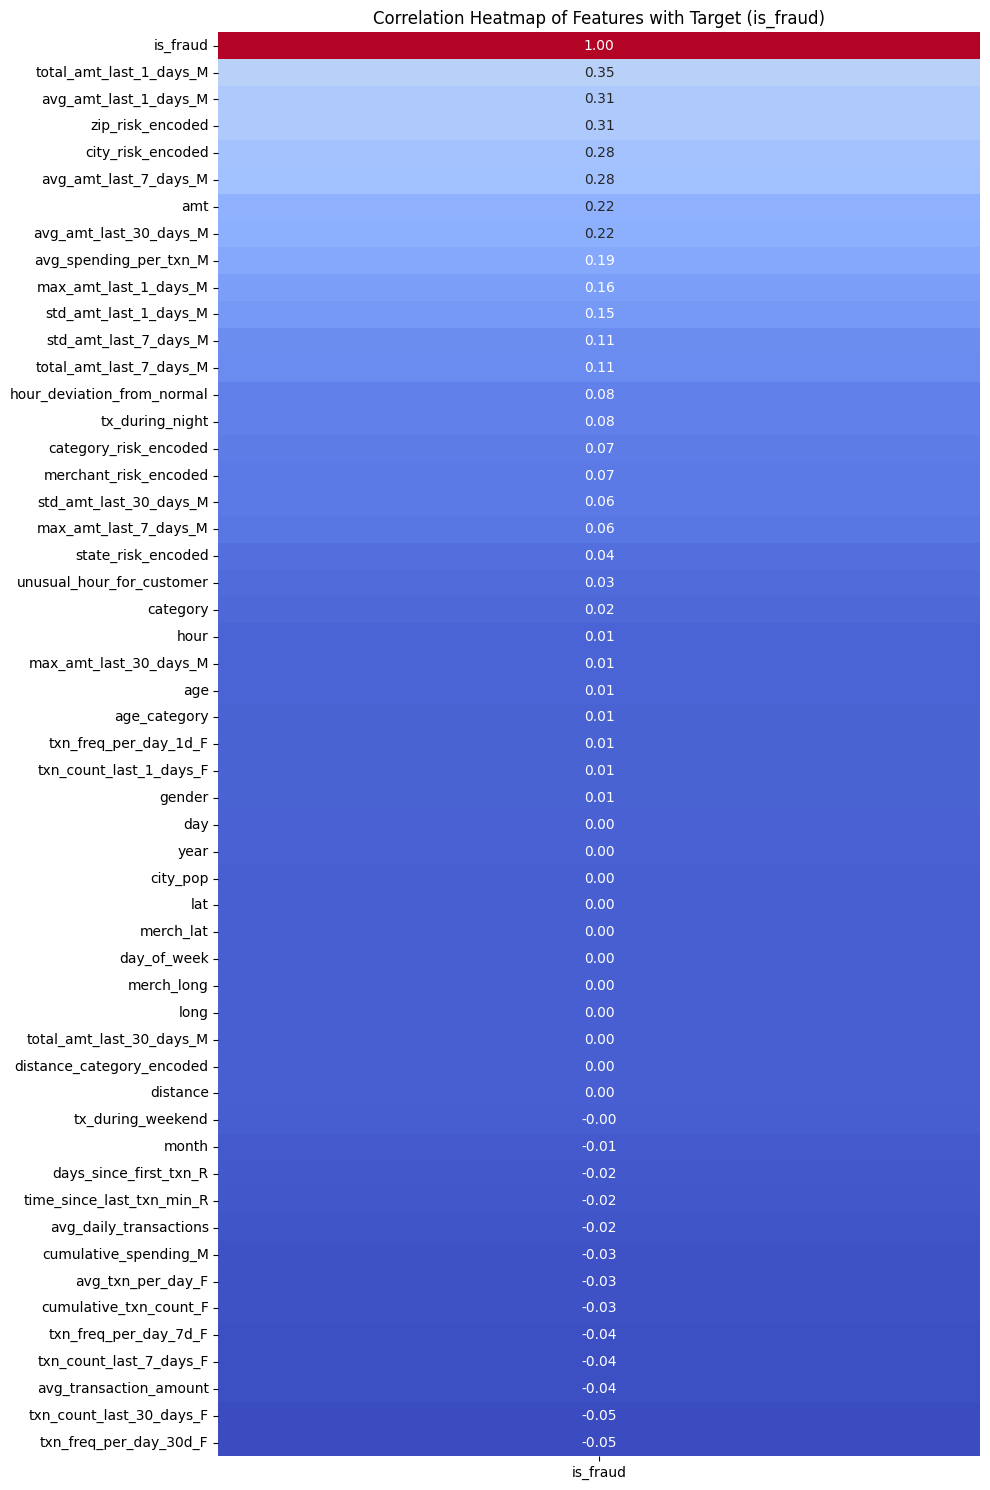

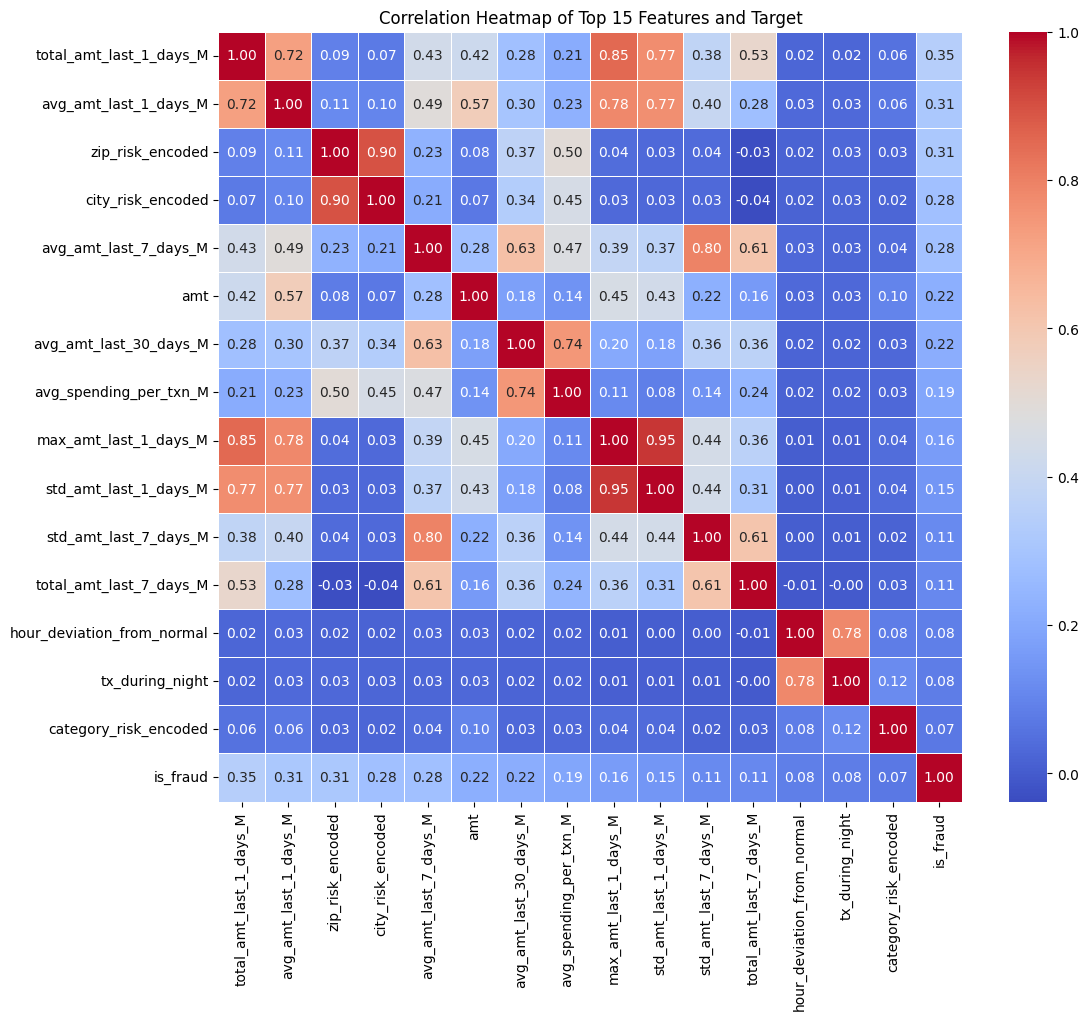

In [52]:
# prompt: plot heatmap korelasi antara X_final dan y_final sebagai target

import pandas as pd
import matplotlib.pyplot as plt
# Gabungkan fitur X dan target y untuk menghitung korelasi
df_corr = pd.concat([X_final, y_final], axis=1)

# Hitung matriks korelasi
corr_matrix = df_corr.corr()

# Ambil korelasi dengan target 'is_fraud' dan urutkan (opsional)
# Anda mungkin ingin memfilter berdasarkan threshold korelasi tertentu
correlation_with_target = corr_matrix['is_fraud'].sort_values(ascending=False)

# Ambil kolom yang relevan untuk heatmap (misalnya, fitur dengan korelasi > threshold)
# Atau, untuk heatmap lengkap, gunakan seluruh matriks korelasi dari fitur + target
# Untuk heatmap korelasi antara X_final dan y_final, kita fokus pada korelasi fitur dengan target
# Heatmap seluruh matriks korelasi juga informatif untuk melihat korelasi antar fitur.

# Option 1: Heatmap korelasi fitur dengan target
plt.figure(figsize=(10, 15)) # Adjust figure size as needed
sns.heatmap(correlation_with_target.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title('Correlation Heatmap of Features with Target (is_fraud)')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Option 2: Heatmap seluruh matriks korelasi (ini bisa sangat besar)
# Jika X_final memiliki banyak kolom, heatmap ini mungkin sulit dibaca.
# Anda bisa memilih subset fitur paling relevan.
# Untuk tujuan ilustrasi, mari buat heatmap untuk 15 fitur teratas (berdasarkan korelasi dengan target) + target
top_features = correlation_with_target.drop('is_fraud').abs().sort_values(ascending=False).head(15).index.tolist()
cols_for_heatmap = top_features + ['is_fraud']
corr_subset = df_corr[cols_for_heatmap].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_subset, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Top 15 Features and Target')
plt.show()

In [53]:
# Recreate df_corr
df_corr = pd.concat([X_final, y_final], axis=1)

# Hitung korelasi semua fitur dengan target
correlation_with_target = df_corr.corr()['is_fraud'].drop('is_fraud')

# Tetapkan threshold absolut korelasi
threshold = 0.01

# Pilih fitur dengan |korelasi| >= threshold
selected_features = correlation_with_target[correlation_with_target.abs() >= threshold].index.tolist()

# Tampilkan fitur terpilih
print("Fitur yang dipilih berdasarkan |korelasi| >= {:.2f} dengan target:".format(threshold))
print(selected_features)

# Buat X baru hanya dengan fitur terpilih
X_selected = X_final[selected_features]

Fitur yang dipilih berdasarkan |korelasi| >= 0.01 dengan target:
['amt', 'age', 'hour', 'month', 'tx_during_night', 'hour_deviation_from_normal', 'unusual_hour_for_customer', 'merchant_risk_encoded', 'category_risk_encoded', 'zip_risk_encoded', 'city_risk_encoded', 'state_risk_encoded', 'avg_daily_transactions', 'avg_transaction_amount', 'time_since_last_txn_min_R', 'days_since_first_txn_R', 'txn_count_last_7_days_F', 'txn_freq_per_day_7d_F', 'txn_count_last_30_days_F', 'txn_freq_per_day_30d_F', 'cumulative_txn_count_F', 'avg_txn_per_day_F', 'total_amt_last_1_days_M', 'avg_amt_last_1_days_M', 'max_amt_last_1_days_M', 'std_amt_last_1_days_M', 'total_amt_last_7_days_M', 'avg_amt_last_7_days_M', 'max_amt_last_7_days_M', 'std_amt_last_7_days_M', 'avg_amt_last_30_days_M', 'max_amt_last_30_days_M', 'std_amt_last_30_days_M', 'cumulative_spending_M', 'avg_spending_per_txn_M', 'category']


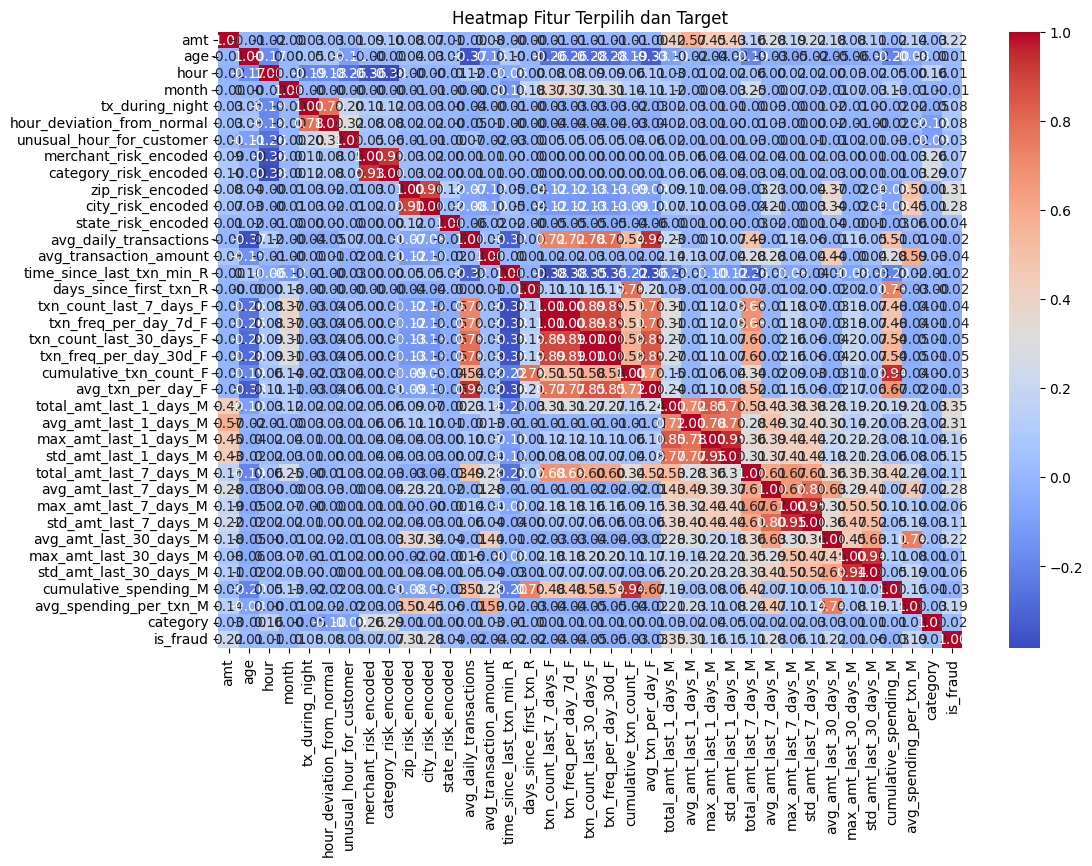

In [54]:
# Tambahkan target untuk visualisasi heatmap
df_selected = pd.concat([X_selected, y_final], axis=1)
plt.figure(figsize=(12, 8))
sns.heatmap(df_selected.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Fitur Terpilih dan Target")
plt.show()


In [55]:
X_selection = df_selected.drop('is_fraud', axis=1)
y_selection = df_selected['is_fraud']

# Assign ke variabel final
X_final = X_selection
y_final = y_selection

# Train Test Split

Jangan lupa pakai stratify = y

In [56]:
# Pisahkan fitur dan target
X = X_final
y = y_final

# Split data dengan stratifikasi
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Cek hasil
print("Ukuran Data:")
print(f"Train: {X_train.shape}, Test: {X_test.shape}")
print("Distribusi kelas:")
print(f"Train: \n{y_train.value_counts(normalize=True)}")
print(f"Test: \n{y_test.value_counts(normalize=True)}")

#Tambah scaler

Ukuran Data:
Train: (1037340, 36), Test: (259335, 36)
Distribusi kelas:
Train: 
is_fraud
0    0.994211
1    0.005789
Name: proportion, dtype: float64
Test: 
is_fraud
0    0.994212
1    0.005788
Name: proportion, dtype: float64


## Handling Imbalance Data (Training Data)

Hanya data train aja yang boleh di Handling Imbalance

### Plot data sebelum di imbalance

/tmp/ipython-input-79-1134894131.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette="pastel")


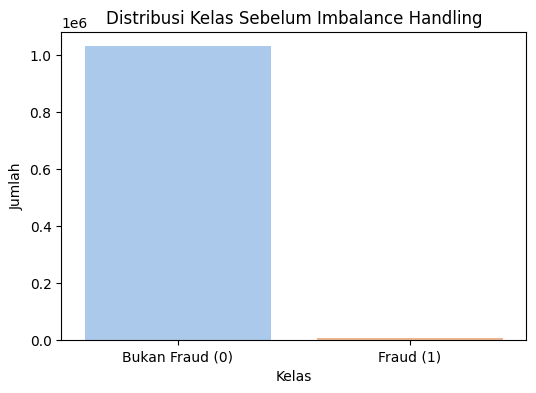

Distribusi sebelum SMOTE:
is_fraud
0    0.994211
1    0.005789
Name: proportion, dtype: float64
is_fraud
0    1031335
1       6005
Name: count, dtype: int64


In [79]:
# Plot distribusi sebelum handling imbalance
plt.figure(figsize=(6,4))
sns.countplot(x=y_train, palette="pastel")
plt.title("Distribusi Kelas Sebelum Imbalance Handling")
plt.xlabel("Kelas")
plt.ylabel("Jumlah")
plt.xticks([0, 1], ["Bukan Fraud (0)", "Fraud (1)"])
plt.show()

# Jika ingin melihat proporsi:
print("Distribusi sebelum SMOTE:")
print(y_train.value_counts(normalize=True))
print(y_train.value_counts())

### SMOTE Hybrid

In [57]:
from sklearn.utils import resample

# Merge the training independent variable and target that we split just before
train_data = pd.concat([X_train, y_train], axis=1)

# Separate majority and minority classes in the merged training data
majority_class = train_data[train_data['is_fraud'] == 0]
minority_class = train_data[train_data['is_fraud'] == 1]

# The size for the majority class after undersampling will be 10:1
majority_size = len(minority_class) * 10  # For a 10:1 ratio

# Performs random undersampling on the majority class
undersampled_majority = resample(
    majority_class,
    replace=False,
    n_samples=majority_size,
    random_state=42
)

# Combine the undersampled majority class with the original minority class
balanced_train_data = pd.concat([undersampled_majority, minority_class])

# Separate the features and target variable again
x_b_train = balanced_train_data.drop(columns=['is_fraud'])
y_b_train = balanced_train_data['is_fraud']

In [58]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

# Drop datetime and original categorical columns before applying SMOTE
cols_to_drop = ['trans_date_trans_time', 'trans_date', 'trans_time', 'dob', 'merchant', 'category', 'gender', 'street', 'city', 'state', 'job', 'distance_category']
x_b_train_numeric = x_b_train.drop(columns=cols_to_drop, errors='ignore')

# Perform SMOTE on the training data
X_train_smote, y_train_smote = smote.fit_resample(x_b_train_numeric, y_b_train)

In [59]:
print(f"After SMOTE - Training set size: {X_train_smote.shape}")
print(f"After SMOTE - Class distribution: {pd.Series(y_train_smote).value_counts()}")

After SMOTE - Training set size: (120100, 35)
After SMOTE - Class distribution: is_fraud
0    60050
1    60050
Name: count, dtype: int64


### Plot data setelah di imbalance

/tmp/ipython-input-80-1150555414.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_smote, palette="Set2")


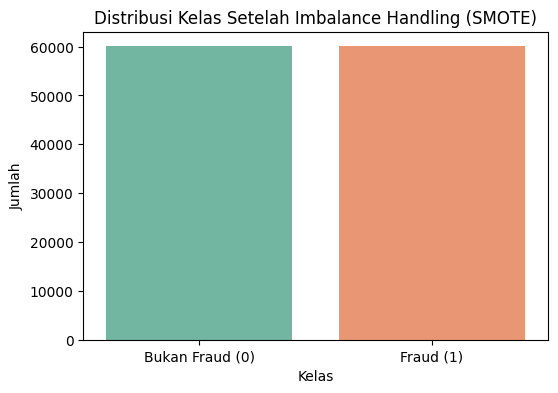

Distribusi setelah SMOTE:
is_fraud
0    0.5
1    0.5
Name: proportion, dtype: float64
is_fraud
0    60050
1    60050
Name: count, dtype: int64


In [80]:
# Plot distribusi setelah SMOTE (atau Hybrid)
plt.figure(figsize=(6,4))
sns.countplot(x=y_train_smote, palette="Set2")
plt.title("Distribusi Kelas Setelah Imbalance Handling (SMOTE)")
plt.xlabel("Kelas")
plt.ylabel("Jumlah")
plt.xticks([0, 1], ["Bukan Fraud (0)", "Fraud (1)"])
plt.show()

# Cek proporsinya
print("Distribusi setelah SMOTE:")
print(pd.Series(y_train_smote).value_counts(normalize=True))
print(pd.Series(y_train_smote).value_counts())

# Modelling

## Logistics Regression

In [130]:
#Pilih hanya fitur numerik
X = X_train_smote
y = y_train_smote

#Imputasi median untuk missing values
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

#Standardisasi fitur
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


#Logistic Regression
lr_smote = LogisticRegression(max_iter=1000, solver='liblinear')
lr_smote.fit(X_scaled, y)

X_test = X_test.drop(columns='category', errors='ignore')

#Prediksi
y_pred_smote = lr_smote.predict(X_test)

#Evaluasi
print("Classification Report (Logistic Regression with SMOTE):")
print(classification_report(y_test, y_pred_smote))
print(confusion_matrix(y_test, y_pred_smote))

Classification Report (Logistic Regression with SMOTE):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    257834
           1       0.11      0.22      0.15      1501

    accuracy                           0.98    259335
   macro avg       0.55      0.61      0.57    259335
weighted avg       0.99      0.98      0.99    259335

[[255072   2762]
 [  1164    337]]


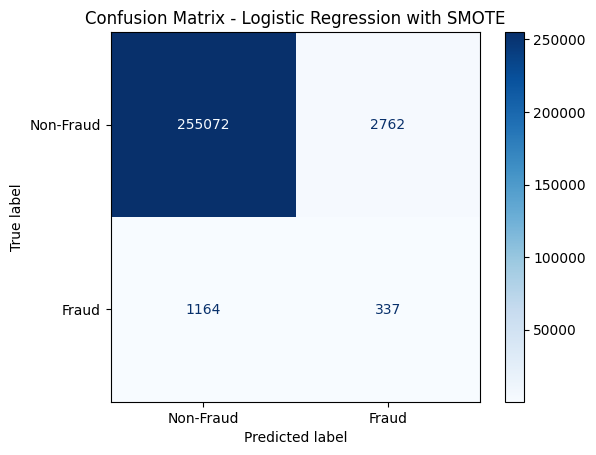

In [131]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_smote)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Fraud', 'Fraud'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Logistic Regression with SMOTE")
plt.grid(False)
plt.show()

### Hyperparameter Tuning - Logistic Regresssion

In [62]:
# # Train-test split
# # X_train, X_test, y_train, y_test = train_test_split(
#   #   X, y, test_size=0.2, stratify=y, random_state=42
# )

# # Pipeline: Imputer → Scaler → SMOTE → Logistic Regression
# # pipeline = ImbPipeline([
#     ('imputer', SimpleImputer(strategy='median')),
#     ('scaler', StandardScaler()),
#     ('smote', SMOTE(random_state=42)),
#     ('logreg', LogisticRegression(max_iter=1000))
# ])

# # Hyperparameter grid (cukup ringan tapi efektif)
# param_grid = {
#     'logreg__C': [0.01, 0.1, 1, 10],
#     'logreg__penalty': ['l1', 'l2'],
#     'logreg__solver': ['liblinear']  # 'liblinear' supports both L1 and L2
# }

# # GridSearchCV dengan scoring F1 untuk kelas minoritas
# grid = GridSearchCV(pipeline, param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=1)
# grid.fit(X_train, y_train)

# # Best estimator dan prediksi
# best_model = grid.best_estimator_
# y_pred = best_model.predict(X_test)

# # Hasil evaluasi
# print("Best Params:", grid.best_params_)
# print("\nClassification Report (Logistic Regression with SMOTE + Tuning):")
# print(classification_report(y_test, y_pred))

In [63]:
# # Confusion Matrix
# cm = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(5, 4))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix - Tuned Logistic Regression (SMOTE)')
# plt.tight_layout()
# plt.show()

# # Classification Report
# print(classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud']))

### Top 10 Most Importance Feature - Logistic Regression

/tmp/ipython-input-133-1216004958.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, x='Abs_Coefficient', y='Feature', palette='viridis')


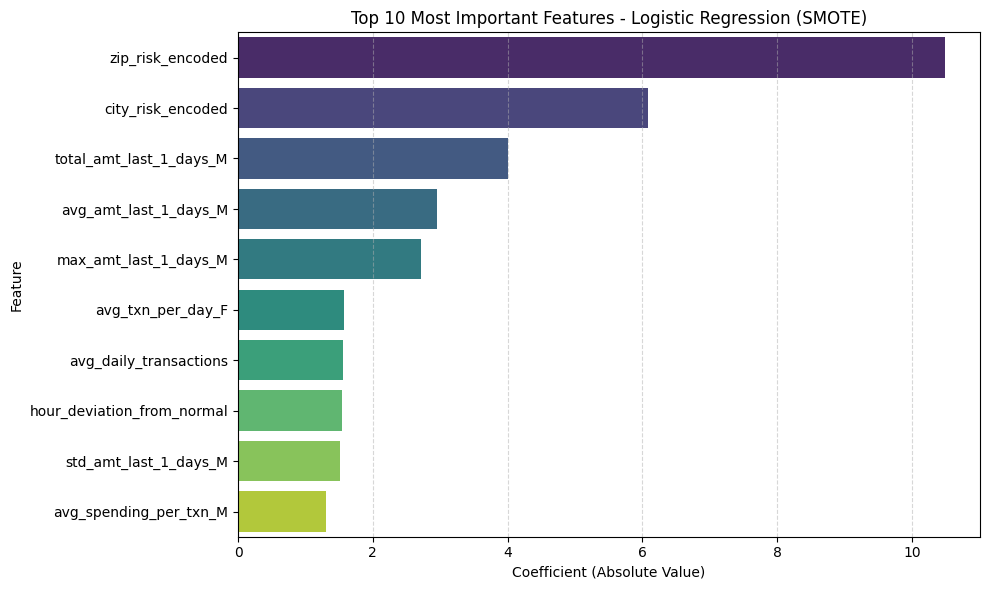

In [133]:
if isinstance(X_scaled, np.ndarray):
    # If X_scaled is a numpy array, use the column names from the original DataFrame X_train_smote
    feature_names = X_train_smote.columns
else:
    # If X_scaled is already a DataFrame with proper column names
    feature_names = X_scaled.columns


coefficients = lr_smote.coef_[0]

# Buat DataFrame fitur dan koefisien
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
})

# Urutkan berdasarkan nilai absolut koefisien tertinggi
top_features = feature_importance.sort_values(by='Abs_Coefficient', ascending=False).head(10)

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(data=top_features, x='Abs_Coefficient', y='Feature', palette='viridis')
plt.title('Top 10 Most Important Features - Logistic Regression (SMOTE)')
plt.xlabel('Coefficient (Absolute Value)')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## RandomForest

In [66]:
rf_smote = RandomForestClassifier(n_estimators=300, max_depth=None, random_state=42)
rf_smote.fit(X_train_smote, y_train_smote)

RandomForestClassifier(n_estimators=300, random_state=42)

In [67]:
y_pred_rf_smote = rf_smote.predict(X_test)
y_prob_rf_smote = rf_smote.predict_proba(X_test)[:, 1]

In [68]:
print(confusion_matrix(y_test, y_pred_rf_smote))
print(classification_report(y_test, y_pred_rf_smote))

[[256053   1781]
 [    72   1429]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    257834
           1       0.45      0.95      0.61      1501

    accuracy                           0.99    259335
   macro avg       0.72      0.97      0.80    259335
weighted avg       1.00      0.99      0.99    259335



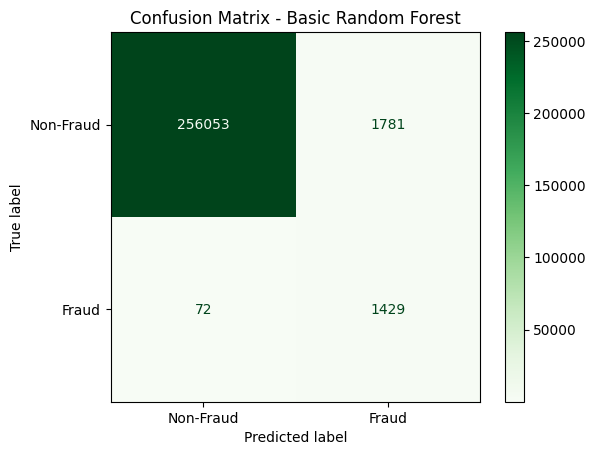

In [128]:
cm_rf = confusion_matrix(y_test, y_pred_rf_smote)
ConfusionMatrixDisplay(cm_rf, display_labels=['Non-Fraud', 'Fraud']).plot(cmap='Greens', values_format='d')
plt.title("Confusion Matrix - Basic Random Forest")
plt.grid(False)
plt.show()

### Hyperparameter Tuning - Random Forest

In [ ]:
# Pipeline RF
#rf_grid = {
 #   'n_estimators': [50, 200],
  #  'max_depth': [10, 15],
   # 'min_samples_split': [2, 5],
    #'min_samples_leaf': [1, 3]
#}

#rf_clf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Grid Search CV
#rf_search = GridSearchCV(rf_clf, rf_grid, cv=3, scoring='f1', verbose=1, n_jobs=-1)
#rf_search.fit(X_train_smote, y_train_smote)

# Best model + prediction
#best_rf = rf_search.best_estimator_
#y_pred_best_rf = best_rf.predict(X_test)

# Evaluasi
#print("Best RF Params:", rf_search.best_params_)
#print("Classification Report - Tuned RF:")
#print(classification_report(y_test, y_pred_best_rf))

# Confusion Matrix
#cm_best_rf = confusion_matrix(y_test, y_pred_best_rf)
#disp_best_rf = ConfusionMatrixDisplay(confusion_matrix=cm_best_rf, display_labels=['Non-Fraud', 'Fraud'])

#plt.figure(figsize=(5, 4))
#disp_best_rf.plot(cmap='Oranges', values_format='d')
#plt.title("Confusion Matrix - Tuned Random Forest")
#plt.grid(False)
#plt.show()


### Top 10 Most Importance Feature - Random Forest

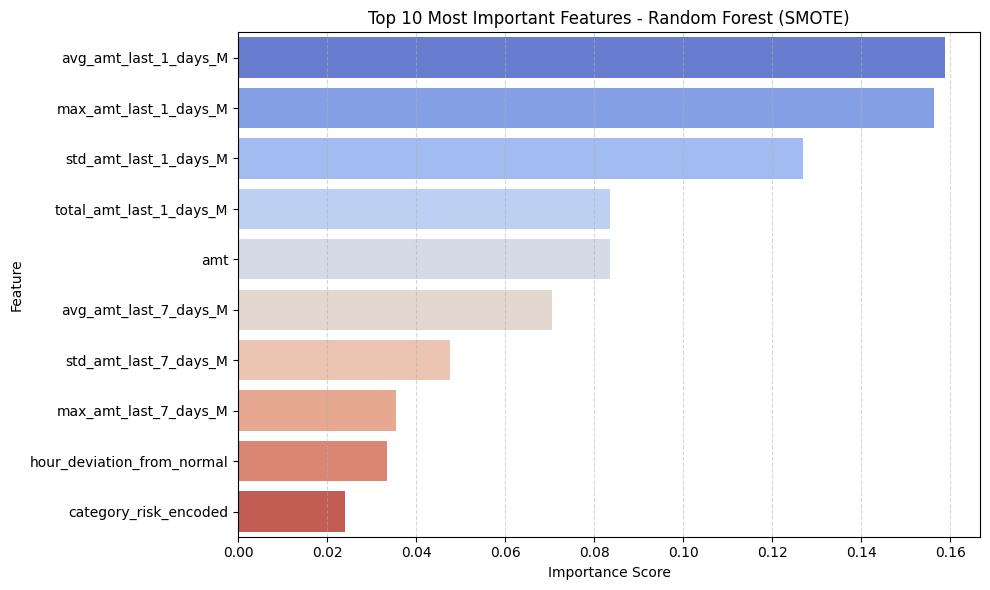

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Ambil feature importance dari model Random Forest yang sudah dilatih
feature_importances_rf = rf_smote.feature_importances_

# Buat DataFrame untuk feature dan importance score
feature_importance_df_rf = pd.DataFrame({
    'Feature': X_train_smote.columns,
    'Importance': feature_importances_rf
})

# Urutkan berdasarkan importance score tertinggi
top_features_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False).head(10)

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(data=top_features_rf, x='Importance', y='Feature', palette='coolwarm')
plt.title('Top 10 Most Important Features - Random Forest (SMOTE)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# XGB

In [69]:
from xgboost import XGBClassifier

xgb_smote = XGBClassifier(
    n_estimators=400,
    max_depth=8,
    learning_rate=0.1,
    random_state=42,
)


In [70]:
xgb_smote.fit(X_train_smote, y_train_smote)

y_pred_xgb_smote = xgb_smote.predict(X_test)
y_prob_xgb_smote = xgb_smote.predict_proba(X_test)[:, 1]

In [71]:
print(confusion_matrix(y_test, y_pred_xgb_smote))
print(classification_report(y_test, y_pred_xgb_smote))

[[257233    601]
 [    45   1456]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.71      0.97      0.82      1501

    accuracy                           1.00    259335
   macro avg       0.85      0.98      0.91    259335
weighted avg       1.00      1.00      1.00    259335



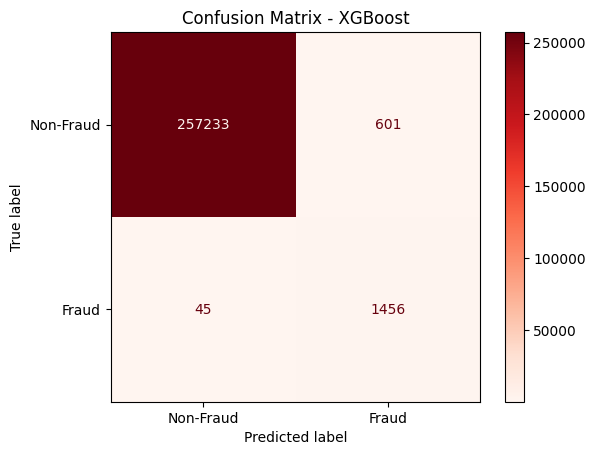

In [94]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb_smote)
ConfusionMatrixDisplay(cm_xgb, display_labels=['Non-Fraud', 'Fraud']).plot(cmap='Reds', values_format='d')
plt.title("Confusion Matrix - XGBoost")
plt.grid(False)
plt.show()

## XGB with thershold tuning

In [100]:
from xgboost import XGBClassifier

xgb_smote = XGBClassifier(
    n_estimators=400,
    max_depth=8,
    learning_rate=0.1,
    random_state=42,
)


In [101]:
xgb_smote.fit(X_train_smote, y_train_smote)

y_pred_xgb_smote = xgb_smote.predict(X_test)
y_prob_xgb_smote = xgb_smote.predict_proba(X_test)[:, 1]
y_pred_thresh = (y_prob_xgb_smote > 0.85).astype(int)

In [125]:
print(confusion_matrix(y_test, y_pred_thresh))
print(classification_report(y_test, y_pred_thresh))

[[257541    293]
 [    68   1433]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.83      0.95      0.89      1501

    accuracy                           1.00    259335
   macro avg       0.91      0.98      0.94    259335
weighted avg       1.00      1.00      1.00    259335



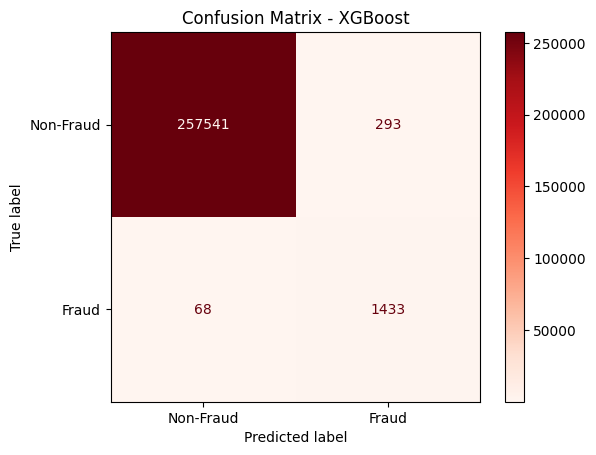

In [127]:
cm_xgb = confusion_matrix(y_test, y_pred_thresh)
ConfusionMatrixDisplay(cm_xgb, display_labels=['Non-Fraud', 'Fraud']).plot(cmap='Reds', values_format='d')
plt.title("Confusion Matrix - XGBoost")
plt.grid(False)
plt.show()

/tmp/ipython-input-134-3427926508.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features_xgb, x='Importance', y='Feature', palette='plasma')


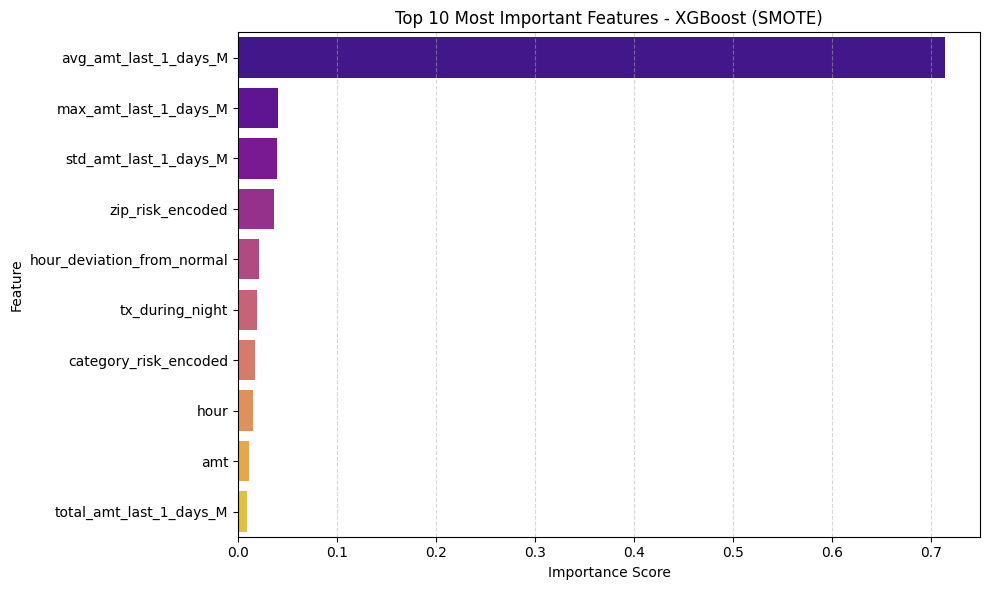

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
# Ambil feature importance dari model XGBoost yang sudah dilatih
feature_importances_xgb = xgb_smote.feature_importances_

# Buat DataFrame untuk feature dan importance score
feature_importance_df_xgb = pd.DataFrame({
    'Feature': X_train_smote.columns,
    'Importance': feature_importances_xgb
})

# Urutkan berdasarkan importance score tertinggi
top_features_xgb = feature_importance_df_xgb.sort_values(by='Importance', ascending=False).head(10)

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(data=top_features_xgb, x='Importance', y='Feature', palette='plasma')
plt.title('Top 10 Most Important Features - XGBoost (SMOTE)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Model Comparison

In [108]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Buat dictionary evaluasi untuk masing-masing model
model_scores = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_smote),
        accuracy_score(y_test, y_pred_rf_smote),
        accuracy_score(y_test, y_pred_thresh)
    ],
    "Precision": [
        precision_score(y_test, y_pred_smote),
        precision_score(y_test, y_pred_rf_smote),
        precision_score(y_test, y_pred_thresh)
    ],
    "Recall": [
        recall_score(y_test, y_pred_smote),
        recall_score(y_test, y_pred_rf_smote),
        recall_score(y_test, y_pred_thresh)
    ],
    "F1-Score": [
        f1_score(y_test, y_pred_smote),
        f1_score(y_test, y_pred_rf_smote),
        f1_score(y_test, y_pred_thresh)
    ]
}

# Konversi ke DataFrame
comparison_df = pd.DataFrame(model_scores)
comparison_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.984861,0.108745,0.224517,0.146522
1,Random Forest,0.992855,0.445171,0.952032,0.606665
2,XGBoost,0.998608,0.830243,0.954697,0.888131


In [105]:
model_scores = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_smote),
        accuracy_score(y_test, y_pred_rf_smote),
        accuracy_score(y_test, y_pred_thresh)
    ],
    "Precision (Macro)": [
        precision_score(y_test, y_pred_smote, average='macro'),
        precision_score(y_test, y_pred_rf_smote, average='macro'),
        precision_score(y_test, y_pred_thresh, average='macro')
    ],
    "Recall (Macro)": [
        recall_score(y_test, y_pred_smote, average='macro'),
        recall_score(y_test, y_pred_rf_smote, average='macro'),
        recall_score(y_test, y_pred_thresh, average='macro')
    ],
    "F1-Score (Macro)": [
        f1_score(y_test, y_pred_smote, average='macro'),
        f1_score(y_test, y_pred_rf_smote, average='macro'),
        f1_score(y_test, y_pred_thresh, average='macro')
    ]
}

# Konversi ke DataFrame
comparison_df = pd.DataFrame(model_scores)
comparison_df

,Model,Accuracy,Precision (Macro),Recall (Macro),F1-Score (Macro)
0,Logistic Regression,0.984861,0.552101,0.606902,0.569442
1,Random Forest,0.992855,0.722445,0.972562,0.801530
2,XGBoost,0.998608,0.914990,0.976780,0.943716


In [107]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Buat dictionary evaluasi untuk masing-masing model
model_scores = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_smote),
        accuracy_score(y_test, y_pred_rf_smote),
        accuracy_score(y_test, y_pred_thresh)
    ],
    "Precision": [
        precision_score(y_test, y_pred_smote),
        precision_score(y_test, y_pred_rf_smote),
        precision_score(y_test, y_pred_thresh)
    ],
    "Recall": [
        recall_score(y_test, y_pred_smote),
        recall_score(y_test, y_pred_rf_smote),
        recall_score(y_test, y_pred_thresh)
    ],
    "F1-Score": [
        f1_score(y_test, y_pred_smote),
        f1_score(y_test, y_pred_rf_smote),
        f1_score(y_test, y_pred_thresh)
    ],
    "Precision (Macro)": [
        precision_score(y_test, y_pred_smote, average='macro'),
        precision_score(y_test, y_pred_rf_smote, average='macro'),
        precision_score(y_test, y_pred_thresh, average='macro')
    ],
    "Recall (Macro)": [
        recall_score(y_test, y_pred_smote, average='macro'),
        recall_score(y_test, y_pred_rf_smote, average='macro'),
        recall_score(y_test, y_pred_thresh, average='macro')
    ],
    "F1-Score (Macro)": [
        f1_score(y_test, y_pred_smote, average='macro'),
        f1_score(y_test, y_pred_rf_smote, average='macro'),
        f1_score(y_test, y_pred_thresh, average='macro')
    ]
}

# Konversi ke DataFrame
comparison_df = pd.DataFrame(model_scores)
comparison_df

,Model,Accuracy,Precision,Recall,F1-Score,Precision (Macro),Recall (Macro),F1-Score (Macro)
0,Logistic Regression,0.984861,0.108745,0.224517,0.146522,0.552101,0.606902,0.569442
1,Random Forest,0.992855,0.445171,0.952032,0.606665,0.722445,0.972562,0.801530
2,XGBoost,0.998608,0.830243,0.954697,0.888131,0.914990,0.976780,0.943716


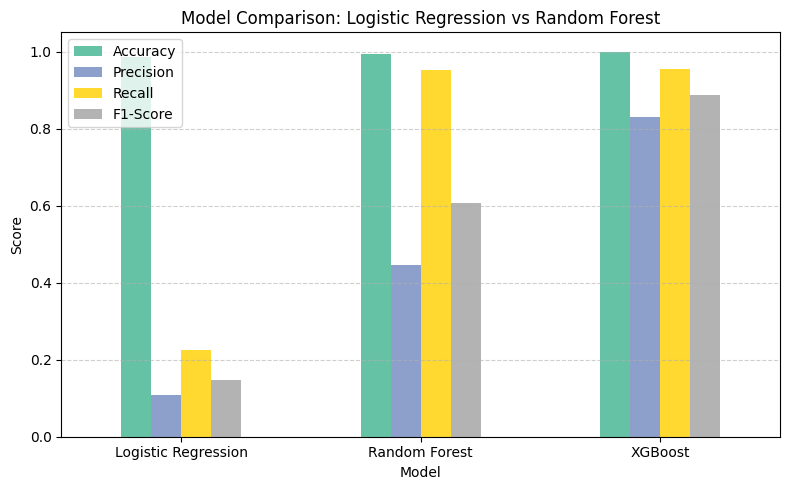

In [132]:
# Visualisasi perbandingan model score

# Plot bar per metrik
comparison_df.set_index("Model").plot(kind="bar", figsize=(8, 5), colormap="Set2")
plt.title("Model Comparison: Logistic Regression vs Random Forest")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0, 1.05)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


# Features Importance